In [1]:
#Actividad Final- Carlos Rubén Carrera Padilla

#La gerencia quiere construir un sistema inteligente para segregar a las personas en grupos de puntaje de crédito para reducir los esfuerzos manuales.

#Tarea
#Dada la información relacionada con el crédito de una persona, crear un modelo de aprendizaje automático que pueda clasificar el puntaje crediticio.

In [2]:
#ID: Represents a unique identification of an entry
#Customer_ID: Represents a unique identification of a person  <--- No relevante ¿Sera unico? 
#Month: Represents the month of the year   <- No importante
#Name: Represents the name of a person  <--  No importante
#Age: Represents the age of the person  < -- No relevante
#SSN: Represents the social security number of a person <- No importante 
#Occupation: Represents the occupation of the person 
#Annual_Income: Represents the annual income of the person
#Monthly_Base_Salary: Represents the monthly base salary of a person
#Num_Bank_Accounts: Represents the number of bank accounts a person holds
#Num_Credit_Card: Represents the number of other credit cards held by a person
#Interest_Rate: Represents the interest rate on credit card
#Num_of_Loan: Represents the number of loans taken from the bank
#Type_of_Loan: Represents the types of loan taken by a person
#Delay_from_due_date: Represents the average number of days delayed from the payment date
#Num_of_delayed_Payment: Represents the average number of payments delayed by a person
#Changed_Credit_Limit: Represents the percentage change in credit card limit
#Num_Credit_Inquiries: Represents the number of credit card inquiries
#Credit_Mix: Represents the classification of the mix of credits
#Outstanding_Debt: Represents the remaining debt to be paid (in USD)
#Credit_Utilization_Ratio: Represents the utilization ratio of credit card
#Credit_History_Age: Represents the age of credit history of the person
#Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
#Total_EMI_per_month: Represents the monthly EMI payments (in USD)
#Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
#Payment_Behaviour: Represents the payment behavior of the customer (in USD)
#Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
#Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

In [366]:
#Librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.options.display.max_columns = 8

In [359]:
#Conjunto de Datos 
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv',encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [361]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Text(0.5, 1.0, ' Valores faltantes en los datos')

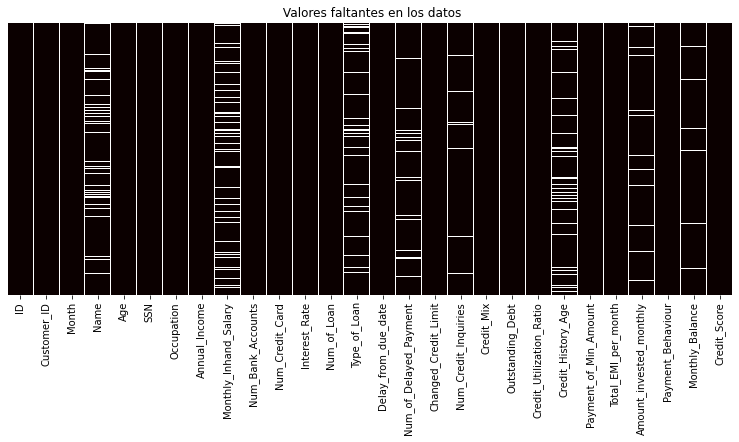

In [5]:
#Observamos valores faltantes en ambos conjuntos de datos 

#Datos de entrenamiento
plt.figure(figsize=(13,5))
sns.heatmap(df_train.isnull(),cbar= False, cmap='hot',yticklabels = False)
plt.title(' Valores faltantes en los datos')

Text(0.5, 1.0, ' Valores faltantes en los datos')

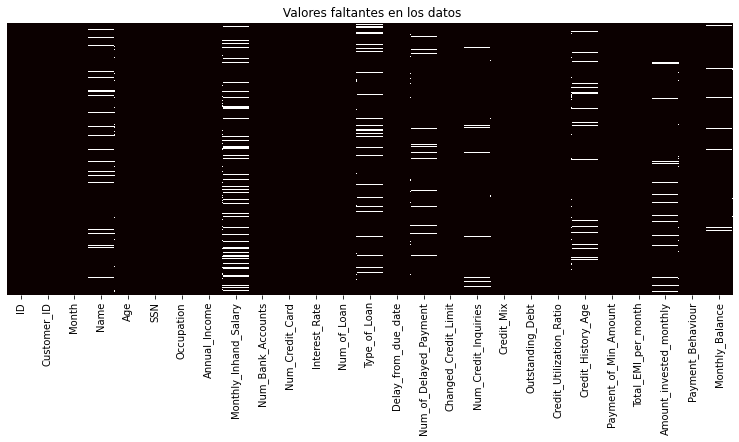

In [6]:
#Datos de testeo
plt.figure(figsize=(13,5))
sns.heatmap(df_test.isnull(),cbar= False, cmap='hot',yticklabels = False)
plt.title(' Valores faltantes en los datos')

In [7]:
## Lo primero que hacer es limpiar los datos.


In [8]:
#Borrar cada vez que limpiemos 
#e eliminan columnas que son innecesarias para el estudio y que a mi consideración no aportan información relevante
# por su cantidad de valores únicos y que no tienen relación  unos con otros colo lo es el nombre , la edad, nombre, número de seguro social.

droplist=['Age','Name','ID','SSN','Type_of_Loan']
for column in droplist: df_train.drop(column, axis=1, inplace=True)



In [9]:
#Esta celda elimina información repetida y agrupa 
df_train=df_train[df_train['Customer_ID'].duplicated()]

In [367]:
#Obse3rvamos que hay mismos clientes con datos invariantes vacios , lo cual sugiere que podemos llenar con entradas llenas.
df_train[df_train['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,...,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,...,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,...,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,...,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,...,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,...,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,...,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,...,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [13]:
#convertimos en numericas las columnas en un conjunto 
convert= [ 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']


In [14]:

#LIMPIEZA 
#### Funciona < CONVIERTE A FLOAT PARA TRABAJAR Y ELIMINA LOS GUINES BAJOS 
for column in convert:
    if(df_train[column].dtype == np.float64 or df_train[column].dtype == np.int64):
        df_train[column]=df_train[column].astype(float)
    else:
      #print(column)    
      df_train[column]=df_train[column].str.replace("_","")


In [15]:
lstPNan=df_train.index[df_train['Monthly_Balance'] == '-333333333333333333333333333'].tolist() #Lista para colocoar en estas posiciones de MB NaN
for index in lstPNan:
  df_train.at[index,'Monthly_Balance']=np.NaN

In [16]:
lstpay=df_train.index[df_train['Payment_Behaviour']=='!@9#%8'].tolist()
for index in lstpay:
  df_train.at[index,'Payment_Behaviour']=np.NaN

In [17]:
lstOcc=df_train.index[df_train['Occupation']=='_______'].tolist()
for index in lstOcc:
  df_train.at[index,'Occupation']=np.NaN

In [18]:
#lstCredit=df_train[]
lstCredit=df_train.index[df_train['Credit_Mix']=='_'].tolist()
for index in lstCredit:
  df_train.at[index,'Credit_Mix']=np.NaN

In [18]:
#CONVERTIMOS A NUMERICAS

In [19]:
for column in convert:
    if(df_train[column].dtype != np.float64 and df_train[column].dtype != np.int64): 
     df_train[column]=pd.to_numeric(df_train[column])

In [20]:
df_train.sample(5)

,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
54381,CUS_0xa2b,June,Manager,89256.75,7379.062500,8.0,5.0,15.0,0,13.0,10.0,1.92,0.0,NaN,49.03,39.448807,21 Years and 2 Months,Yes,0.000000,195.607118,Low_spent_Medium_value_payments,822.299132,Standard
29573,CUS_0x7be2,June,Journalist,71889.08,6266.756667,823.0,8.0,22.0,3,44.0,13.0,18.49,15.0,Standard,2461.32,31.072546,20 Years and 4 Months,Yes,109.660777,288.269462,Low_spent_Medium_value_payments,508.745428,Poor
76618,CUS_0x4889,March,Accountant,61540.56,5352.380000,7.0,8.0,17.0,4,52.0,15.0,17.15,7.0,Standard,1599.30,38.507698,18 Years and 7 Months,Yes,146.198219,10000.000000,High_spent_Small_value_payments,477.302330,Standard
87070,CUS_0xc222,July,Architect,57507.24,4859.556312,6.0,6.0,9.0,6,16.0,16.0,13.24,5.0,NaN,1278.15,30.972768,18 Years and 11 Months,Yes,451.147209,205.952773,NaN,284.240706,Standard
56874,CUS_0x5523,March,Lawyer,73062.60,6267.550000,4.0,7.0,20.0,4,20.0,15.0,14.24,8.0,Standard,280.10,42.116997,17 Years and 0 Months,Yes,176.852443,109.144640,High_spent_Large_value_payments,580.757917,Standard


In [21]:
# En esta parte hacemos computables los atributos pasandolos a números. 
#Observación hay que dejar los nan 

In [22]:
#df_train['Credit_Score'].unique()
df_train['Credit_Score'] = df_train['Credit_Score'].replace(['Good', 'Standard', 'Poor'],[1,2,3])

In [23]:
#df_train['Credit_Mix'].unique()
df_train['Credit_Mix'] = df_train['Credit_Mix'].replace(['Good', 'Standard', 'Bad'],[1,2,3])

In [24]:
#df_train['Payment_of_Min_Amount'].unique()
df_train['Payment_of_Min_Amount'] = df_train['Payment_of_Min_Amount'].replace(['No', 'NM', 'Yes'],[1,2,3])
#Payment_of_Min_Amount


In [25]:
k=list(range(1,8))
lstrepl=df_train['Month'].unique()
df_train['Month']=df_train['Month'].replace(lstrepl,k)


In [26]:
lstrepl=df_train['Occupation'].unique()
lstrepl=lstrepl.tolist()
lstrepl.pop(3)

k=list(range(1,len(lstrepl)+1))
df_train['Occupation']=df_train['Occupation'].replace(lstrepl,k)


In [27]:
# 
lstrepl=df_train['Payment_Behaviour'].unique()
lstrepl=lstrepl.tolist()
lstrepl.pop(4)
k=list(range(1,len(lstrepl)+1))
df_train['Payment_Behaviour']=df_train['Payment_Behaviour'].replace(lstrepl,k)

In [28]:
convert.append('Payment_of_Min_Amount')
convert.append('Credit_Score')

In [29]:
### Agrupamos y hay que acompletar con la información que sí tenemos 
#aquí hago un nuevo dataframe para 
df1=df_train

In [30]:
df1.head(20)

,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,CUS_0xd40,1,1.0,19114.12,NaN,3.0,4.0,3.0,4,-1.0,NaN,11.27,4.0,1.0,809.98,31.944960,NaN,1,49.574949,118.280222,1.0,284.629162,1
2,CUS_0xd40,2,1.0,19114.12,NaN,3.0,4.0,3.0,4,3.0,7.0,NaN,4.0,1.0,809.98,28.609352,22 Years and 3 Months,1,49.574949,81.699521,2.0,331.209863,1
3,CUS_0xd40,3,1.0,19114.12,NaN,3.0,4.0,3.0,4,5.0,4.0,6.27,4.0,1.0,809.98,31.377862,22 Years and 4 Months,1,49.574949,199.458074,3.0,223.451310,1
4,CUS_0xd40,4,1.0,19114.12,1824.843333,3.0,4.0,3.0,4,6.0,NaN,11.27,4.0,1.0,809.98,24.797347,22 Years and 5 Months,1,49.574949,41.420153,4.0,341.489231,1
5,CUS_0xd40,5,1.0,19114.12,NaN,3.0,4.0,3.0,4,8.0,4.0,9.27,4.0,1.0,809.98,27.262259,22 Years and 6 Months,1,49.574949,62.430172,NaN,340.479212,1
6,CUS_0xd40,6,1.0,19114.12,1824.843333,3.0,4.0,3.0,4,3.0,8.0,11.27,4.0,1.0,809.98,22.537593,22 Years and 7 Months,1,49.574949,178.344067,3.0,244.565317,1
7,CUS_0xd40,7,1.0,19114.12,1824.843333,3.0,4.0,3.0,4,3.0,6.0,11.27,4.0,1.0,809.98,23.933795,NaN,1,49.574949,24.785217,4.0,358.124168,2
9,CUS_0x21b1,1,2.0,34847.84,3037.986667,2.0,4.0,6.0,1,7.0,1.0,7.42,2.0,1.0,605.03,38.550848,26 Years and 8 Months,1,18.816215,40.391238,5.0,484.591214,1
10,CUS_0x21b1,2,2.0,34847.84,3037.986667,2.0,1385.0,6.0,1,3.0,-1.0,5.42,2.0,NaN,605.03,33.224951,26 Years and 9 Months,1,18.816215,58.515976,5.0,466.466476,2
11,CUS_0x21b1,3,2.0,34847.84,NaN,2.0,4.0,6.0,1,3.0,3.0,5.42,2.0,1.0,605.03,39.182656,26 Years and 10 Months,1,18.816215,99.306228,2.0,465.676224,1


In [31]:
#convertimos todo a flotante

df1['Num_of_Loan']=df1['Num_of_Loan'].astype(float)
convert.append('Payment_of_Min_Amount')
convert.append('Credit_Score')
convert.append('Month')
for column in convert: 
  if(df1[column].dtype == np.int64):   
    df1[column]=df1[column].apply(lambda x:float(x))

In [32]:
# Comprobar que no existan valores negativos
lstrlp=[]
for column in convert:
    if(df1[column].dtype == np.float64 or df1[column].dtype == np.int64): 
    #Quitamos los numeros negativos
      lstrlp=df1.index[df1[column]<0].tolist()
      for row in lstrlp: df1.at[row,column]=np.NaN

In [33]:
#Funcion que transforma df1['Credit_History_Age'] to numbers
import re
import math
def returndays(datest):
  '''str -> float
  Función que toma una fecha en formato  '22 Years and 1 Months'  y lo convierte en 22.08333.
  Requiere importar re 
  Requiere importar math
  '''
  if isinstance(datest,str):
    my_string=datest
    new_string=re.findall(r'\d+', my_string)
    a=round((int(new_string[1]))/12,5)
    return int(new_string[0])+a 
  elif math.isnan(datest):
    return np.NaN

In [34]:
#Aplicamos la función 
df1['Credit_History_Age']=df1['Credit_History_Age'].apply(returndays)

In [35]:
df1.tail(7)

,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99993,CUS_0x942c,1.0,13.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,NaN,11.5,3.0,1.0,502.38,29.135447,31.33333,1.0,58638.000000,180.733095,2.0,NaN,2.0
99994,CUS_0x942c,2.0,13.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,9.5,3.0,NaN,502.38,39.323569,31.41667,1.0,35.104023,140.581403,4.0,NaN,3.0
99995,CUS_0x942c,3.0,13.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.5,3.0,NaN,502.38,34.663572,31.50000,1.0,35.104023,60.971333,5.0,NaN,3.0
99996,CUS_0x942c,4.0,13.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.5,3.0,NaN,502.38,40.565631,31.58333,1.0,35.104023,54.185950,4.0,NaN,3.0
99997,CUS_0x942c,5.0,13.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,27.0,6.0,11.5,3.0,1.0,502.38,41.255522,31.66667,1.0,35.104023,24.028477,5.0,NaN,3.0
99998,CUS_0x942c,6.0,13.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,NaN,11.5,3.0,1.0,502.38,33.638208,31.75000,1.0,35.104023,251.672582,1.0,NaN,2.0
99999,CUS_0x942c,7.0,13.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,6.0,11.5,3.0,1.0,502.38,34.192463,31.83333,1.0,35.104023,167.163865,NaN,NaN,3.0


In [36]:
#Función que busca math nan
def matnantonp(valor):
  '''float -> float
  Función que toma una valor y si el valor es un math.nan lo transforma en un np.NaN 
  Requiere importar math
  '''
  if math.isnan(valor):
    return np.NaN
  else: return valor

In [37]:
lstdf1=df1.iloc[:,1:].columns.tolist()
for column in lstdf1: df1[column]=df1[column].apply(matnantonp) 

In [38]:
columnas22=[]
for select in lstdf1: columnas22.append(select)

In [39]:
columnas22

['Month',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [40]:
#Función remplaza nan por el de un mismo ID que contenga el valor buscado. 

In [41]:
from pandas.core.api import isnull


In [82]:
#FUNCIONA WOW  WOW WOW <-- AquI CHECK POINT
### Nota personal, la primera fila si null se llena a mano o con la segunda
columna='Monthly_Inhand_Salary'
lstaux=df1.index[np.isnan(df1[columna])].tolist()

#Aquí va for
for k in range(len(lstaux)):
#------------------------------------------------------------------------------------------------------------------
#k=0
  varup= lstaux[k]-1
  vardown=lstaux[k]+1
  lstnull=[]
  if((varup in df1.index) and(df1.at[varup,'Customer_ID']==df1.at[lstaux[k],'Customer_ID']) and (not isnull(df1.at[varup,columna]) )):
     df1.at[lstaux[k],columna]=df1.at[varup,columna]
  elif(((vardown in df1.index))and(df1.at[vardown,'Customer_ID']==df1.at[lstaux[k],'Customer_ID']) and (not isnull(df1.at[vardown,columna]) )):
    df1.at[lstaux[k],columna]=df1.at[vardown,columna]
  else:
    df1.at[lstaux[k],columna]=np.NaN

In [83]:
lstaux=df1.index[np.isnan(df1[columna])].tolist()

In [84]:
##################################################

In [85]:
## A continuación hacemos el código para todas las columnas hay que cuidar 

for columna in columnas22:
  lstaux=df1.index[np.isnan(df1[columna])].tolist()

#Aquí va for
  for k in range(len(lstaux)):
#------------------------------------------------------------------------------------------------------------------
#k=0
    varup= lstaux[k]-1
    vardown=lstaux[k]+1
    lstnull=[]
   
    if((varup in df1.index) and(df1.at[varup,'Customer_ID']==df1.at[lstaux[k],'Customer_ID']) and (not isnull(df1.at[varup,columna]) )):
       df1.at[lstaux[k],columna]=df1.at[varup,columna]
    elif(((vardown in df1.index))and(df1.at[vardown,'Customer_ID']==df1.at[lstaux[k],'Customer_ID']) and (not isnull(df1.at[vardown,columna]) )):
      df1.at[lstaux[k],columna]=df1.at[vardown,columna]
    else:
      df1.at[lstaux[k],columna]=np.NaN

In [86]:
df1['Monthly_Balance'].tail()

99995    402.284733
99996    402.284733
99997    402.284733
99998    402.284733
99999    402.284733
Name: Monthly_Balance, dtype: float64

In [87]:
#Nos concentramos en la columna con NaN valores y lo llenamos con el promedio
df1['Monthly_Balance']=df1['Monthly_Balance'].fillna(df1['Monthly_Balance'].mean())

Text(0.5, 1.0, ' Valores faltantes en los datos')

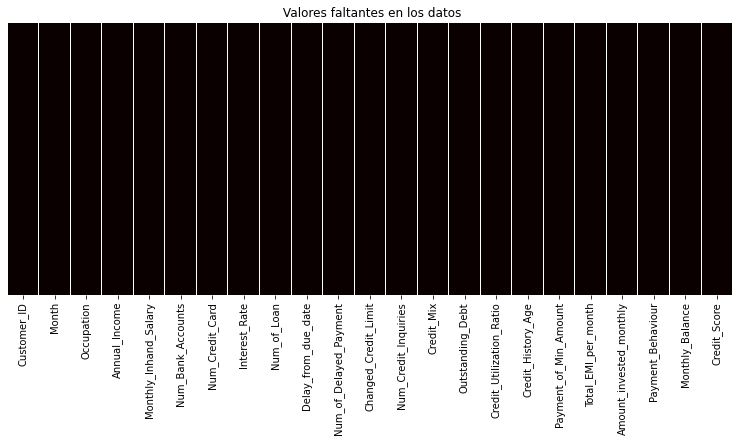

In [88]:
#Observamos valores faltantes en ambos conjuntos de datos 

#Datos de entrenamiento
plt.figure(figsize=(13,5))
sns.heatmap(df1.isnull(),cbar= False, cmap='hot',yticklabels = False)
plt.title(' Valores faltantes en los datos')

In [89]:
#Ahora comenzamos el analisis de las caracteristicas 
df=df1.iloc[:,1:23]


In [90]:
count = np.isinf(df).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 0 infinite values


In [91]:
df = df.reset_index()
df = df[np.isfinite(df).all(1)]

In [92]:
# Observamos la correlaciónn entre las columnas
df.corr()

,index,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
index,1.000000,0.000047,-0.003409,-0.001101,-0.004867,0.000539,-0.005089,0.004771,-0.001201,-0.004753,0.008779,0.008238,0.004639,0.001456,0.002854,-0.005247,-0.005696,-0.005410,0.000946,0.003729,-0.003965,0.000075,-0.005651
Month,0.000047,1.000000,-0.000100,-0.002578,-0.001956,-0.007158,0.002638,-0.000851,0.000297,-0.000260,-0.002382,-0.000128,0.002513,-0.000479,-0.000332,0.004056,0.019859,-0.002000,-0.001612,-0.000598,-0.001046,0.000623,-0.014769
Occupation,-0.003409,-0.000100,1.000000,0.000543,0.005455,-0.000468,0.004384,0.002852,-0.000314,-0.011532,0.002836,-0.003114,-0.001569,-0.000736,-0.002436,0.000473,0.009511,-0.001879,-0.000632,0.001080,-0.007579,0.003542,0.001175
Annual_Income,-0.001101,-0.002578,0.000543,1.000000,0.030761,-0.004797,-0.001017,-0.003809,0.002327,-0.011593,0.001711,0.002061,0.004613,-0.007413,-0.005199,0.008731,-0.000369,-0.006995,0.000025,-0.003135,0.000047,0.021075,-0.009147
Monthly_Inhand_Salary,-0.004867,-0.001956,0.005455,0.030761,1.000000,-0.010240,-0.004962,-0.008092,-0.012624,-0.249666,0.001397,-0.175750,-0.009124,-0.341194,-0.269320,0.174846,0.271700,-0.289424,0.007982,0.062301,0.134894,0.695598,-0.206179
Num_Bank_Accounts,0.000539,-0.007158,-0.000468,-0.004797,-0.010240,1.000000,-0.002684,-0.003497,0.000310,0.017949,-0.004321,0.009445,-0.000441,0.019213,0.015696,-0.001981,-0.012839,0.012573,-0.000423,0.001610,-0.002225,-0.009161,0.011481
Num_Credit_Card,-0.005089,0.002638,0.004384,-0.001017,-0.004962,-0.002684,1.000000,-0.003149,0.001665,0.010585,0.005194,0.004475,-0.004223,0.011672,0.005686,-0.004097,-0.006727,0.010312,0.000686,-0.002206,-0.002987,-0.006461,0.008051
Interest_Rate,0.004771,-0.000851,0.002852,-0.003809,-0.008092,-0.003497,-0.003149,1.000000,-0.000531,0.009303,0.003488,0.001869,-0.000278,0.011321,0.011311,-0.001864,-0.010619,0.008011,0.003863,0.000320,-0.004077,-0.010948,0.003054
Num_of_Loan,-0.001201,0.000297,-0.000314,0.002327,-0.012624,0.000310,0.001665,-0.000531,1.000000,0.014129,0.003211,0.014018,-0.002760,0.023467,0.023987,-0.006279,-0.022767,0.016678,0.003535,-0.001621,0.000521,-0.020647,0.008288
Delay_from_due_date,-0.004753,-0.000260,-0.011532,-0.011593,-0.249666,0.017949,0.010585,0.009303,0.014129,1.000000,0.013914,0.296433,0.014035,0.689077,0.571935,-0.062974,-0.491273,0.475987,-0.002731,-0.013294,-0.037008,-0.278691,0.423720


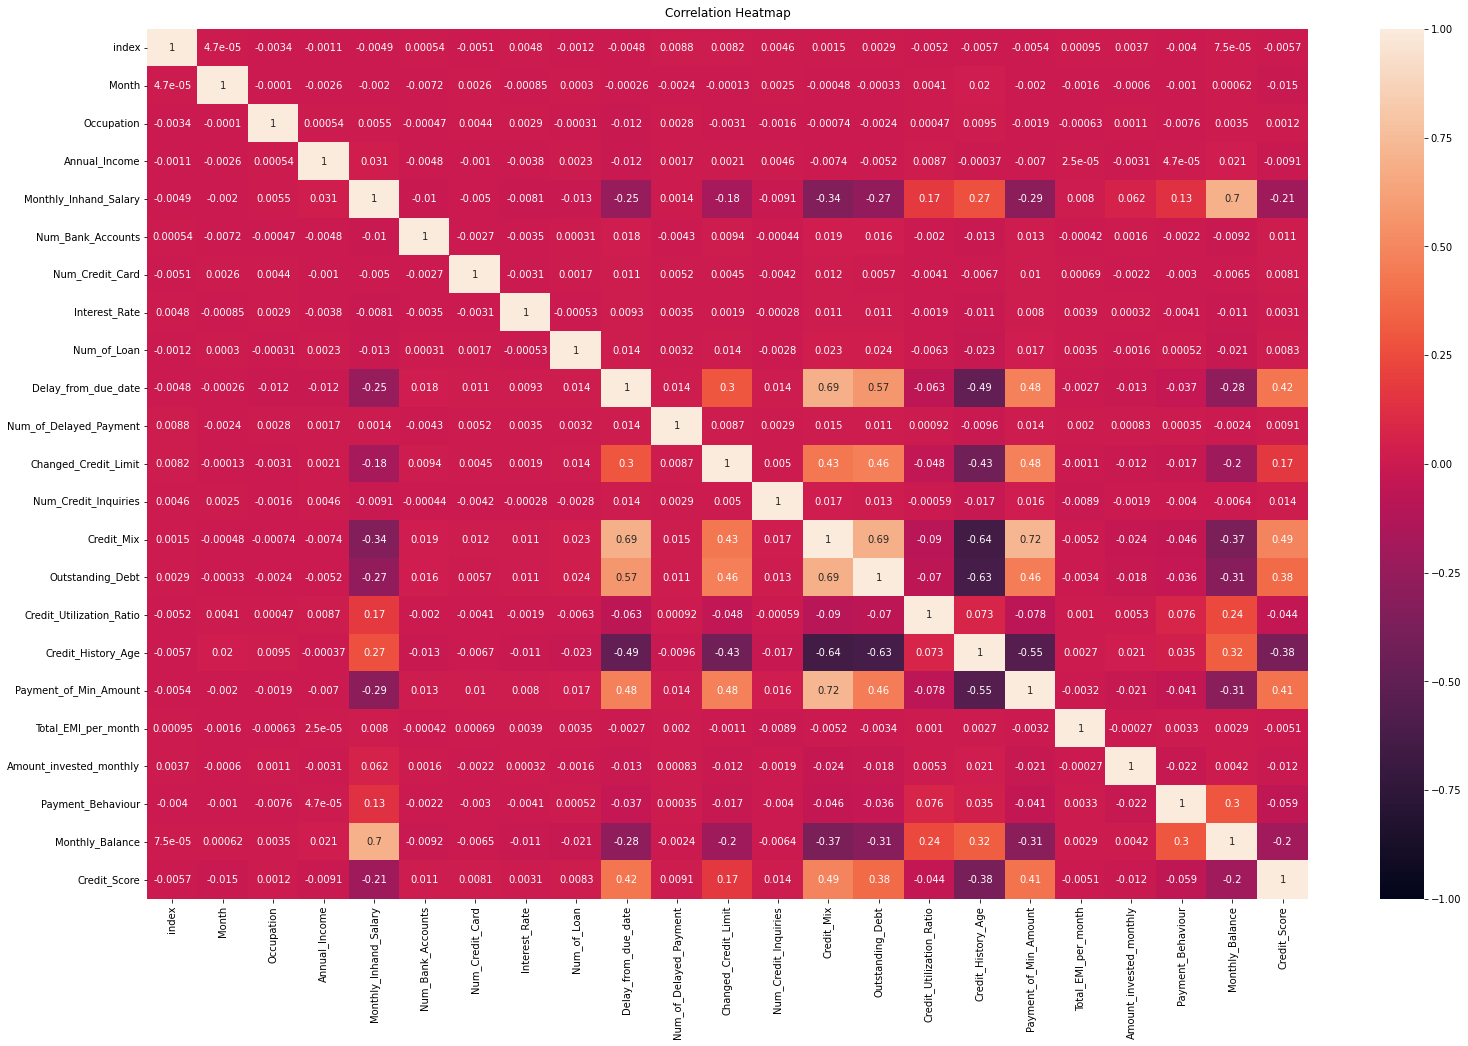

In [93]:
plt.figure(figsize=(26, 16))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [223]:

Y=df['Credit_Score']
X2=df.iloc[:,1:22]



In [224]:
#Elección de parametros

In [222]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [226]:
best =  SelectKBest(chi2, k=3).fit(X2,Y)
best.get_feature_names_out(input_features=None)

array(['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt'],
      dtype=object)

In [227]:
X1=df[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']]

In [228]:
#Dividimos entre test y train 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2,random_state= 55, stratify = Y)   

In [353]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_depth=100)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=100)

In [354]:
predic = RFC.predict(x_test)


In [355]:
accuracy_score(y_test, predic)

0.8005267376617428

In [356]:
pd.crosstab(y_test, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,All
True,,,,
1.0,2505,658,0,3163
2.0,837,7196,1194,9227
3.0,1,794,4281,5076
All,3343,8648,5475,17466


In [357]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

         1.0       0.75      0.79      0.77      3163
         2.0       0.83      0.78      0.81      9227
         3.0       0.78      0.84      0.81      5076

    accuracy                           0.80     17466
   macro avg       0.79      0.81      0.80     17466
weighted avg       0.80      0.80      0.80     17466



In [358]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

RFC = RandomForestClassifier(max_depth=100)

score_rf=cross_val_score(RFC,x_train, y_train,cv=5)
print(score_rf)
print('Avg :',np.average(score_rf))

[0.78980892 0.78515709 0.79108216 0.7930146  0.78134841]
Avg : 0.7880822363869758


In [242]:
from sklearn.ensemble import GradientBoostingClassifier

In [329]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=50)

In [330]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=50)

In [331]:
predic = GBC.predict(x_test)

In [332]:
accuracy_score(y_test, predic)

0.8021298522844383

In [333]:
pd.crosstab(y_test, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,All
True,,,,
1.0,2519,643,1,3163
2.0,846,7149,1232,9227
3.0,2,732,4342,5076
All,3367,8524,5575,17466


In [334]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

         1.0       0.75      0.80      0.77      3163
         2.0       0.84      0.77      0.81      9227
         3.0       0.78      0.86      0.82      5076

    accuracy                           0.80     17466
   macro avg       0.79      0.81      0.80     17466
weighted avg       0.80      0.80      0.80     17466



In [336]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=55)

score_rf=cross_val_score(GBC,x_train, y_train,cv=5)
print(score_rf)
print('Avg :',np.average(score_rf))

[0.79009518 0.78701782 0.79000859 0.78807615 0.78177784]
Avg : 0.7873951171914737


In [267]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier( splitter='best')
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [268]:
predic = Tree.predict(x_test)

In [269]:
print((np.sum(predic == y_test)/len(predic))*100)

79.48013282949731


In [270]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

         1.0       0.73      0.83      0.78      3163
         2.0       0.83      0.78      0.80      9227
         3.0       0.78      0.81      0.80      5076

    accuracy                           0.79     17466
   macro avg       0.78      0.80      0.79     17466
weighted avg       0.80      0.79      0.80     17466



In [271]:
pd.crosstab(y_test, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,All
True,,,,
1.0,2619,536,8,3163
2.0,950,7155,1122,9227
3.0,3,965,4108,5076
All,3572,8656,5238,17466


In [327]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

score_rf=cross_val_score(clf,x_train, y_train,cv=10)
print(score_rf)
print('Avg :',np.average(score_rf))

[0.79018177 0.78860741 0.78786144 0.78957916 0.78528486 0.80002863
 0.80174635 0.79458918 0.78700258 0.78471228]
Avg : 0.7909593645980546
